In [2]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

### Load the dataset

In [3]:
df = pd.read_csv('data.csv')
print(df.shape)
print(df.isnull().any().any()) ##check missing value
df.describe()

(107856, 266)
False


,Y,X0,X2,X3,X4,X5,X6,X8,X9,X11,...,X461,X462,X467,X468,X469,X470,X472,X475,X477,X478
count,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,...,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000,107856.000000
mean,0.615795,1.477952,59.556038,0.001261,0.017700,7.401025,0.282265,1.160102,0.038857,0.000195,...,0.001085,0.012099,0.000436,0.002531,0.036363,0.001140,0.078002,0.013509,0.008660,0.006323
std,0.213486,17.865485,2215.079392,0.035487,1.325519,98.190201,35.262728,32.956659,0.727419,0.063944,...,0.032918,0.109331,0.020871,0.050247,0.187193,0.033751,0.268176,0.115440,0.092654,0.079267
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.777778,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,5727.000000,254212.000000,1.000000,419.000000,5299.000000,5516.000000,6725.000000,91.000000,21.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.head()

,Y,X0,X2,X3,X4,X5,X6,X8,X9,X11,...,X461,X462,X467,X468,X469,X470,X472,X475,X477,X478
0,0.074074,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.684211,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.814815,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.814815,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.421053,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Select the first 20,000 instance as our dataset
- We have normalized the first 20,000 instances in R, and stored in the scaled.csv

In [5]:
trainSet = pd.read_csv('scaled.csv')

print(trainSet.shape)
print(trainSet['Y'].nunique())

X=trainSet.drop(['Y'],axis=1).values
y=trainSet['Y']
trainSet.describe()

(20000, 260)
584


,Y,X0,X2,X3,X4,X5,X6,X8,X9,X12,...,X461,X462,X467,X468,X469,X470,X472,X475,X477,X478
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.744963e-11,-1.707460e-10,3.762456e-10,-7.799558e-11,8.454451e-11,1.642374e-10,2.566001e-10,2.432001e-10,-1.417081e-10,3.614370e-10,...,-4.352489e-10,-1.866000e-10,9.399661e-11,-4.274903e-10,2.738519e-10,3.043041e-10,2.263653e-10,-4.230015e-10,1.094010e-10,4.453120e-10
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.121950e+00,-4.071009e-01,-4.148077e-02,-2.550275e-02,-4.670227e-02,-1.436952e-01,-6.825969e-02,-2.267780e-02,-5.601406e-02,-1.618996e-01,...,-4.186861e-02,-7.071068e-03,-3.810555e-02,-3.875795e-02,-2.786402e-01,-4.362937e-02,-4.069751e-01,-1.704987e-01,-1.378531e-01,-8.212707e-02
25%,-5.054085e-01,-4.071009e-01,-4.148077e-02,-2.550275e-02,-4.670227e-02,-1.436952e-01,-6.825969e-02,-2.267780e-02,-5.601406e-02,-1.618996e-01,...,-4.186861e-02,-7.071068e-03,-3.810555e-02,-3.875795e-02,-2.786402e-01,-4.362937e-02,-4.069751e-01,-1.704987e-01,-1.378531e-01,-8.212707e-02
50%,2.042149e-01,-4.071009e-01,-4.148077e-02,-2.550275e-02,-4.670227e-02,-1.436952e-01,-6.825969e-02,-2.267780e-02,-5.601406e-02,-1.618996e-01,...,-4.186861e-02,-7.071068e-03,-3.810555e-02,-3.875795e-02,-2.786402e-01,-4.362937e-02,-4.069751e-01,-1.704987e-01,-1.378531e-01,-8.212707e-02
75%,7.453135e-01,2.693712e-01,-4.148077e-02,-2.550275e-02,-4.670227e-02,-1.163920e-01,-6.825969e-02,-2.267780e-02,-5.601406e-02,-1.618996e-01,...,-4.186861e-02,-7.071068e-03,-3.810555e-02,-3.875795e-02,-2.786402e-01,-4.362937e-02,-4.069751e-01,-1.704987e-01,-1.378531e-01,-8.212707e-02
max,1.523211e+00,3.341650e+01,7.016052e+01,3.920950e+01,9.335785e+01,7.136328e+01,5.104664e+01,1.406349e+02,2.015959e+01,6.607294e+01,...,2.388305e+01,1.414143e+02,2.624158e+01,2.579987e+01,3.588678e+00,2.291920e+01,2.457030e+00,5.864854e+00,7.253735e+00,1.217564e+01


## Data preprocessing

In [6]:
## preprocess Y, split it into two classes(0,1) according to their value
y_median=y.median()
print(y_median)
for i in range (y.size):
    if y[i]<=y_median: y[i]=0
    else: y[i]=1
print(y.value_counts())

0.204214927
0.0    10078
1.0     9922
Name: Y, dtype: int64


## Model (before dimensionality reduction)
get the f1-score for different models before dimensionality reduction

In [7]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

svm_defult = SVC()
mlp_defult = MLPClassifier()
lr_defult = LogisticRegression()

##print(cross_val_score(svm_defult, X, y, scoring = 'f1_micro', cv=5).mean())
##print(cross_val_score(mlp_defult, X, y, scoring = 'f1_micro', cv=5).mean())
##print(cross_val_score(lr_defult, X, y, scoring = 'f1_micro', cv=5).mean())

## Dimensionality reduction (PCA)
Source: Dimensionality reduction (PCA, tSNE) https://www.kaggle.com/code/tilii7/dimensionality-reduction-pca-tsne

In [8]:
##PCA
pca = PCA(0.95) ##retain 95% variation
X_pca=pca.fit_transform(X)
print(X_pca.shape)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())
print('Individual variance contributions:')
for j in range(pca.n_components_):
    print(pca.explained_variance_ratio_[j])

(20000, 167)
Explained variance: 0.9511
Individual variance contributions:
0.04363245483702663
0.035066007692451315
0.03357159673067317
0.021042265848497797
0.018699541074146946
0.017621538503234727
0.01656789892626742
0.016066236689185165
0.015494023988928008
0.015273635083913774
0.013402244711487384
0.012821148876833846
0.012193131339756458
0.012017958309263561
0.011202306955530058
0.010632528461906003
0.01035651810756499
0.010169174287991368
0.009885615851319024
0.009605390110791086
0.009009317554230544
0.008730367887865909
0.008229447959573744
0.008182922593045214
0.007877812732691713
0.007702753846748025
0.0076394005277728785
0.007583726051378886
0.007531606077857849
0.007459731710961607
0.007290258240008281
0.007233341547420682
0.0071332060184939585
0.007043575176493996
0.006907689078682777
0.006820993366222287
0.006756313635158811
0.006656889290516891
0.006580695448082881
0.006456021483291766
0.00637856672158335
0.00620043380023065
0.006107524868024031
0.0060833557832979425
0.00

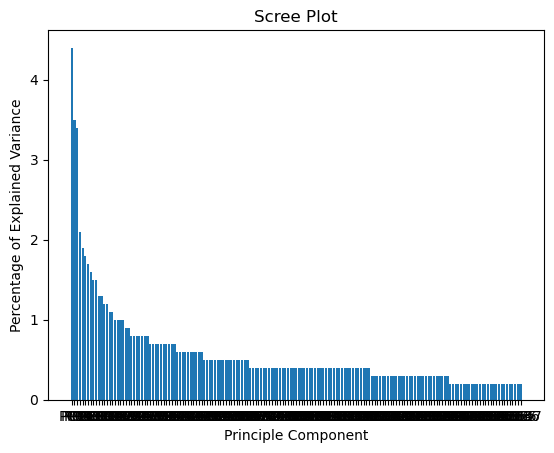

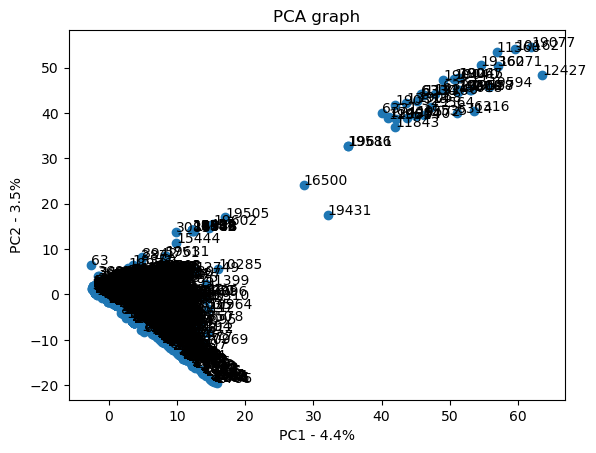

In [9]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

pca_df=pd.DataFrame(X_pca, columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [11]:
pd.DataFrame(X_pca).to_csv("X_pca");